In [48]:
import pandas as pd
df=pd.read_csv('Data Analysis.csv')
df.head(10)


,Customer ID,Sex,Age,Transaction 1,Transaction 2,Name/Location,Middle name,Last name,Transaction date,Review
0,100,M,M24,$1000,$100,James/Canada,David,Harris,10-01-2025,The iPhone's camera is absolutely stunning—wor...
1,101,F,F27,$500,$50,Sham/USA,P,Anderson,10-01-2025,The iPhone's Face ID is quick and works flawle...
2,102,M,M30,$700,$70,William/USA,Thomas,Harris,10-01-2025,Samsung Galaxy -the best Android phone I’ve ev...
3,103,F,F33,$300,$30,yuih/USA,NaN,Luis,21-02-2025,Motorola is “perfect for everyday tasks and gr...
4,104,NaN,4567,$500,$50,Rabin/Canada,NaN,Turner,21-02-2025,The iPhone feels premium and the performance i...
5,105,M,NaN,$700,$700,suren/USA,Kumar,sarkar,21-02-2025,was surprised that the Samsung Galaxy “takes a...
6,106,M,M42,$300,$30,jina/Canada,NaN,palu,21-02-2025,Motorola gives you the basics done right—no fl...
7,107,F,F45,$1000,$1000,Brian/Canada,S,Harris,05-03-2025,The iPhone is a productivity powerhouse that k...
8,108,M,M32,$122900,$12290,Akib/Canada,NaN,NaN,05-03-2025,"Samsung Galaxy, calling it “fast, sleek, and i..."
9,109,F,F33,$300,$300,Richard/USA,NaN,Anderson,05-03-2025,Motorola to be “a solid budget phone with impr...


In [49]:
df.isnull().sum()

Customer ID         0
Sex                 1
Age                 1
Transaction 1       0
Transaction 2       0
Name/Location       0
Middle name         5
Last name           1
Transaction date    0
Review              0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Customer ID       10 non-null     int64 
 1   Sex               9 non-null      object
 2   Age               9 non-null      object
 3   Transaction 1     10 non-null     object
 4   Transaction 2     10 non-null     object
 5   Name/Location     10 non-null     object
 6   Middle name       5 non-null      object
 7   Last name         9 non-null      object
 8   Transaction date  10 non-null     object
 9   Review            10 non-null     object
dtypes: int64(1), object(9)
memory usage: 932.0+ bytes


## Column operation

In [51]:
#replace value
df['Transaction 1']= df['Transaction 1'].str.replace('$', ' ')
df['Transaction 2']= df['Transaction 2'].str.replace('$', ' ')
#change data type
df['Transaction 1']=df['Transaction 1'].astype(int)
df['Transaction 2']=df['Transaction 2'].astype(int)

In [52]:
#column calculation
def sum(row):
    return (row['Transaction 1']+ row['Transaction 2'])
df['Total_transaction']=df.apply(sum, axis=1)


In [53]:
#binning
def binning(row):
    if row['Total_transaction']>1000:
        return 'High'
    elif row['Total_transaction']>500:
        return 'Medium'
    else:
        return'Low'
df['Transaction_level']=df.apply(binning, axis=1)


In [54]:
#split column
df[['Name','Location']]= df['Name/Location'].str.split('/', expand=True)

In [55]:
#join column
df['Full_name']= df['Name'].fillna(' ')+ ' '+df['Middle name'].fillna(' ')+ ' '+ df['Last name'].fillna(' ')

In [56]:
#drop column
df=df.drop(['Transaction 1','Transaction 2','Name/Location','Middle name','Last name','Name'], axis=1)

In [57]:
# extract data
import re
df['product_name']=df['Review'].str.extract(r'(iPhone|Samsung Galaxy|Motorola)',flags=re.IGNORECASE)

In [58]:
df['comment']=df['Review'].str.findall(r'(stunning|quick|flawless| perfect)',flags=re.IGNORECASE)
df.head(2)

,Customer ID,Sex,Age,Transaction date,Review,Total_transaction,Transaction_level,Location,Full_name,product_name,comment
0,100,M,M24,10-01-2025,The iPhone's camera is absolutely stunning—wor...,1100,High,Canada,James David Harris,iPhone,[stunning]
1,101,F,F27,10-01-2025,The iPhone's Face ID is quick and works flawle...,550,Medium,USA,Sham P Anderson,iPhone,"[quick, flawless]"


In [59]:
# slice last 2 digit
df['Age']=df['Age'].str.slice(1,3)

In [60]:
#missing value calculation
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Sex']=df['Sex'].fillna(df['Sex'].mode()[0])


In [61]:
#outliers
q1= df['Total_transaction'].quantile(0.25)
q3= df['Total_transaction'].quantile(0.75)
IQR= q3-q1
upper_limit= q3+1.5*IQR
lower_limit= q1-1.5*IQR
df['Total_transaction']=df['Total_transaction'].clip(lower_limit,upper_limit)


In [62]:
#datetime change
df['Transaction date']= pd.to_datetime(df['Transaction date'], format= '%d-%m-%Y')
df['month']=df['Transaction date'].dt.to_period('M')

In [63]:
df.columns

Index(['Customer ID ', 'Sex', 'Age', 'Transaction date', 'Review',
       'Total_transaction', 'Transaction_level', 'Location', 'Full_name',
       'product_name', 'comment', 'month'],
      dtype='object')

In [64]:
#strip column name
df['Customer ID ']=df['Customer ID '].astype(str)
df['Customer ID']=df['Customer ID '].str.strip()

In [65]:
df.columns

Index(['Customer ID ', 'Sex', 'Age', 'Transaction date', 'Review',
       'Total_transaction', 'Transaction_level', 'Location', 'Full_name',
       'product_name', 'comment', 'month', 'Customer ID'],
      dtype='object')

In [67]:
#rename column
data=df.rename( columns={'Transaction date': 'Transaction_date'})
#select column
data=data[['Customer ID', 'Sex', 'Age', 'Transaction_date','Total_transaction', 'Transaction_level', 'Location', 'Full_name',
       'product_name', 'month']]
data


,Customer ID,Sex,Age,Transaction_date,Total_transaction,Transaction_level,Location,Full_name,product_name,month
0,100,M,24,2025-01-10,1100.0,High,Canada,James David Harris,iPhone,2025-01
1,101,F,27,2025-01-10,550.0,Medium,USA,Sham P Anderson,iPhone,2025-01
2,102,M,30,2025-01-10,770.0,Medium,USA,William Thomas Harris,Samsung Galaxy,2025-01
3,103,F,33,2025-02-21,330.0,Low,USA,yuih Luis,Motorola,2025-02
4,104,M,56,2025-02-21,550.0,Medium,Canada,Rabin Turner,iPhone,2025-02
5,105,M,33,2025-02-21,1400.0,High,USA,suren Kumar sarkar,Samsung Galaxy,2025-02
6,106,M,42,2025-02-21,330.0,Low,Canada,jina palu,Motorola,2025-02
7,107,F,45,2025-03-05,2000.0,High,Canada,Brian S Harris,iPhone,2025-03
8,108,M,32,2025-03-05,2487.5,High,Canada,Akib,Samsung Galaxy,2025-03
9,109,F,33,2025-03-05,600.0,Medium,USA,Richard Anderson,Motorola,2025-03


## Row operation

In [68]:
#filter row and column
condition= (data['product_name']== 'iPhone') & (data['Transaction_level'].isin (['High','Medium']))
data_con= data.loc[condition, ['Full_name','Location','Total_transaction']]
data_con

,Full_name,Location,Total_transaction
0,James David Harris,Canada,1100.0
1,Sham P Anderson,USA,550.0
4,Rabin Turner,Canada,550.0
7,Brian S Harris,Canada,2000.0


In [69]:
data_iphone = data.loc[
    data['product_name'].str.contains('iphone', case=False, na=False),
    ['Full_name', 'Location', 'Total_transaction']
]

data_iphone

,Full_name,Location,Total_transaction
0,James David Harris,Canada,1100.0
1,Sham P Anderson,USA,550.0
4,Rabin Turner,Canada,550.0
7,Brian S Harris,Canada,2000.0


In [70]:
#groupby and sorting
data_group= data.groupby('product_name')['Total_transaction'].mean().reset_index()
data_group.sort_values(by= 'Total_transaction', ascending=False)

,product_name,Total_transaction
1,Samsung Galaxy,1552.5
2,iPhone,1050.0
0,Motorola,420.0


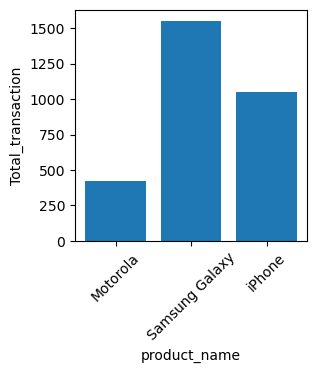

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.bar(data_group['product_name'],data_group['Total_transaction'])
plt.xlabel('product_name')
plt.ylabel('Total_transaction')
plt.xticks(rotation=45)
plt.show()

In [72]:
#top 2 bottom 2
top_2=data_group.sort_values(by= 'Total_transaction', ascending=False).head(2)
bottom_2=data_group.sort_values(by= 'Total_transaction', ascending=False).tail(2)

In [73]:
#Locationwise sales of product
pd.pivot_table(data, 
               values='Total_transaction',
               index='Location', 
               columns='product_name', 
               aggfunc='mean')

product_name,Motorola,Samsung Galaxy,iPhone
Location,,,
Canada,330.0,2487.5,1216.666667
USA,465.0,1085.0,550.000000


## dataframe create and merge

In [74]:
dic1= [{ 'Employee No':1, 'Name': 'Jam', 'Location':'Canada'},
       { 'Employee No':2, 'Name': 'sham', 'Location':'USA'},
       { 'Employee No':3, 'Name': 'rachel', 'Location':'USA'}]
dic2= [{ 'Employee No':4, 'Name': 'Paul', 'Location':'Canada'},
       { 'Employee No':5, 'Name': 'Amin', 'Location':'USA'},
       { 'Employee No':6, 'Name': 'Suresh', 'Location':'USA'}]
dic3= [{ 'Employee No':1, 'Age': 40},
       { 'Employee No':2, 'Age': 30},
       { 'Employee No':3, 'Age': 40},
       { 'Employee No':4,'Age': 35},
       { 'Employee No':5, 'Age': 32},
       { 'Employee No':6, 'Age': 45}]

In [75]:
df1= pd.DataFrame(dic1)
df2= pd.DataFrame(dic2)
df3= pd.DataFrame(dic3)
df1

,Employee No,Name,Location
0,1,Jam,Canada
1,2,sham,USA
2,3,rachel,USA


In [76]:
df2

,Employee No,Name,Location
0,4,Paul,Canada
1,5,Amin,USA
2,6,Suresh,USA


In [77]:
df3

,Employee No,Age
0,1,40
1,2,30
2,3,40
3,4,35
4,5,32
5,6,45


In [78]:
df1_df2= pd.concat([df1,df2], axis=0)
df1_df2

,Employee No,Name,Location
0,1,Jam,Canada
1,2,sham,USA
2,3,rachel,USA
0,4,Paul,Canada
1,5,Amin,USA
2,6,Suresh,USA


In [79]:
df1_df2_df3=pd.merge(df1_df2,df3, on='Employee No', how='inner')
df1_df2_df3

,Employee No,Name,Location,Age
0,1,Jam,Canada,40
1,2,sham,USA,30
2,3,rachel,USA,40
3,4,Paul,Canada,35
4,5,Amin,USA,32
5,6,Suresh,USA,45


## imbalanced data

In [81]:
import pandas as pd
data=pd.read_csv('attrition_data.csv')
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [82]:
data['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

<Figure size 300x300 with 0 Axes>

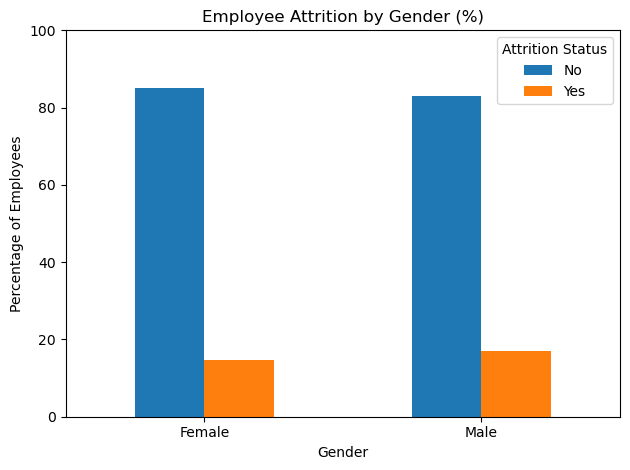

In [83]:
#EDA unbalanced dataset calculation in %: Gender vs. Attrition
ct_counts = pd.crosstab(data['Gender'], data['Attrition'])
ct_pct = ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
ct_pct.plot(kind='bar', rot=0)
plt.title('Employee Attrition by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage of Employees')
plt.legend(title='Attrition Status', loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [84]:
#under sampling
df_no= data.loc[data['Attrition']=='No']
df_yes= data.loc[data['Attrition']=='Yes']
df_no_sample= df_no.sample(len(df_yes),random_state=15)
df_balanced= pd.concat([df_no_sample,df_yes], axis=0)
df_balanced['Attrition'].value_counts()

Attrition
No     237
Yes    237
Name: count, dtype: int64

In [85]:
#over sampling
y=data['Attrition']
X=data.drop(['Attrition','EmployeeNumber','StandardHours','EmployeeCount','Over18'], axis=1)

In [86]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for cols in cat_cols:
    le = LabelEncoder()
    X[cols] = le.fit_transform(X[cols].astype(str)) 
    label_encoders[cols] = le

In [87]:
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [88]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
cat_col_indices = [X.columns.get_loc(col) for col in cat_cols]

# Apply SMOTENC
sampling_strategy = {0:1500, 1:1500}
smote_nc = SMOTENC(sampling_strategy=sampling_strategy, categorical_features=cat_col_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

print(pd.Series(y_resampled).value_counts())

0    1500
1    1500
Name: count, dtype: int64
